In [84]:
import os
import random
import numpy as np

import torch
from torch import nn

import torchvision

print(torch.__version__)
print(torchvision.__version__)

1.12.1.post200
0.13.0a0+8069656


In [121]:
device = "cuda:0" if torch.cuda.is_available() else "cpu";
device

'cuda:0'

In [122]:
train_cifar10 = torchvision.datasets.CIFAR10(root="cifar-10", train=True, transform=torchvision.transforms.ToTensor() ,download=True)
test_cifar10 = torchvision.datasets.CIFAR10(root="cifar-10", train=False, transform=torchvision.transforms.ToTensor() ,download=True)

Files already downloaded and verified
Files already downloaded and verified


In [123]:
classnames = train_cifar10.classes

In [124]:
BATCH_SIZE = 32
train_dataloader = torch.utils.data.DataLoader(train_cifar10, batch_size=BATCH_SIZE,shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_cifar10, batch_size=BATCH_SIZE,shuffle=False)

In [125]:
train_img_batch, train_labels_batch = next(iter(train_dataloader))

In [126]:
print(f"Train batch shapes --> {train_img_batch.shape}  {train_labels_batch.shape}")


Train batch shapes --> torch.Size([32, 3, 32, 32])  torch.Size([32])


In [11]:
# Lets Define a model
begincnn = nn.Sequential()
# CONV1 LAYER
begincnn.add_module('conv1', nn.Conv2d(in_channels=3, out_channels=64, kernel_size=5, stride=1, padding=2))
begincnn.add_module('relu1', nn.ReLU())
begincnn.add_module('pool1', nn.MaxPool2d(kernel_size=2))
# CONV2 LAYER
begincnn.add_module('conv2', nn.Conv2d(in_channels=64, out_channels=128, kernel_size=5, stride=1, padding=2))
begincnn.add_module('relu2', nn.ReLU())
begincnn.add_module('pool2', nn.MaxPool2d(kernel_size=2))
#  FULLY CONNECTED LAYER
begincnn.add_module('flatten', nn.Flatten())
begincnn.add_module('fc1', nn.Linear(8192, 512))
begincnn.add_module('relu3', nn.ReLU())
begincnn.add_module('dropout', nn.Dropout(p=0.5))
begincnn.add_module('fc2', nn.Linear(512,10))

begincnn

Sequential(
  (conv1): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu2): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=8192, out_features=512, bias=True)
  (relu3): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=512, out_features=10, bias=True)
)

In [128]:
begincnn = begincnn.to(device=device)

In [129]:
# Set loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(begincnn.parameters(), lr=0.001)

In [130]:
def train(model, num_epochs, train_dl, test_dl):
  loss_hist_train = [0] * num_epochs
  accuracy_hist_train = [0] * num_epochs
  loss_hist_test = [0] * num_epochs
  accuracy_hist_test = [0] * num_epochs

  for epoch in range(num_epochs):
    model.train()
    for x_batch, y_batch in train_dl:
      x_batch = x_batch.to(device) 
      y_batch = y_batch.to(device)
      pred = model(x_batch)
      loss = loss_fn(pred, y_batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()
      loss_hist_train[epoch] += loss.item()*y_batch.size(0)
      # print("epoch -->", loss_hist_train[epoch])
      is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
      # print("is_correct -->", is_correct)
      accuracy_hist_train[epoch] += is_correct.sum().cpu()
    
    loss_hist_train[epoch] /= len(train_dl.dataset)
    accuracy_hist_train[epoch] /= len(train_dl.dataset)
    
    model.eval()
    with torch.no_grad():
      for x_batch, y_batch in test_dl:
        x_batch = x_batch.to(device) 
        y_batch = y_batch.to(device)  
        pred = model(x_batch)
        loss = loss_fn(pred, y_batch)
        loss_hist_test[epoch] += loss.item()*y_batch.size(0)
        is_correct = (torch.argmax(pred, dim=1) == y_batch).float()
        accuracy_hist_test[epoch] += is_correct.sum().cpu()
    
    loss_hist_test[epoch] /= len(test_dl.dataset)
    accuracy_hist_test[epoch] /= len(test_dl.dataset)
    print(f"EPOCH {epoch+1} train_accuracy: {accuracy_hist_train[epoch]:.4f} test_accuracy: {accuracy_hist_test[epoch]:.4f}")
  return loss_hist_train, accuracy_hist_train, loss_hist_test, accuracy_hist_test

      


In [131]:
torch.manual_seed(42)
num_epochs = 25

hist = train(begincnn, num_epochs, train_dataloader, test_dataloader)


EPOCH 1 train_accuracy: 0.4362 test_accuracy: 0.5549
EPOCH 2 train_accuracy: 0.5638 test_accuracy: 0.6190
EPOCH 3 train_accuracy: 0.6124 test_accuracy: 0.6360
EPOCH 4 train_accuracy: 0.6463 test_accuracy: 0.6742
EPOCH 5 train_accuracy: 0.6687 test_accuracy: 0.6496
EPOCH 6 train_accuracy: 0.6912 test_accuracy: 0.6807
EPOCH 7 train_accuracy: 0.7103 test_accuracy: 0.6855
EPOCH 8 train_accuracy: 0.7236 test_accuracy: 0.6913
EPOCH 9 train_accuracy: 0.7378 test_accuracy: 0.6940
EPOCH 10 train_accuracy: 0.7491 test_accuracy: 0.6909
EPOCH 11 train_accuracy: 0.7623 test_accuracy: 0.7053
EPOCH 12 train_accuracy: 0.7739 test_accuracy: 0.6942
EPOCH 13 train_accuracy: 0.7833 test_accuracy: 0.7044
EPOCH 14 train_accuracy: 0.7916 test_accuracy: 0.7019
EPOCH 15 train_accuracy: 0.8001 test_accuracy: 0.7084
EPOCH 16 train_accuracy: 0.8087 test_accuracy: 0.6975
EPOCH 17 train_accuracy: 0.8131 test_accuracy: 0.7090
EPOCH 18 train_accuracy: 0.8243 test_accuracy: 0.7028
EPOCH 19 train_accuracy: 0.8303 test_

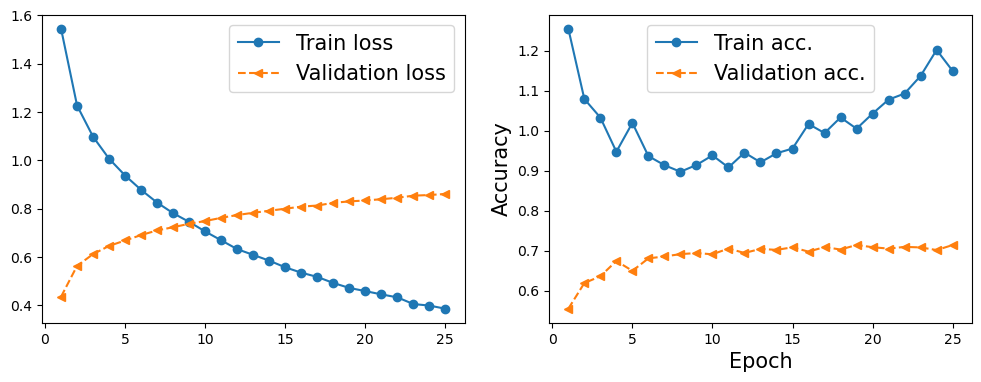

In [132]:
import matplotlib.pyplot as plt
import numpy as np
x_arr = np.arange(len(hist[0])) + 1
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist[0], '-o', label='Train loss')
ax.plot(x_arr, hist[1], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(x_arr, hist[2], '-o', label='Train acc.')
ax.plot(x_arr, hist[3], '--<',label='Validation acc.')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Accuracy', size=15)
plt.show()

### LeNet-5 for MNIST

In [2]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms

BATCH_SIZE = 64
NUM_CLASSES = 10
L_RATE = 0.001
num_epochs = 40

device = "cuda" if torch.cuda.is_available() else "cpu"


/home/c3po/mambaforge/envs/dev-env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Load MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           download=True,
                                           transform=transforms.Compose([transforms.Resize((32,32,)),
                                                                         transforms.ToTensor(),
                                                                         transforms.Normalize(mean=0.1307 , std=0.3081)]))

test_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=False,
                                           download=True,
                                           transform=transforms.Compose([transforms.Resize((32,32,)),
                                                                         transforms.ToTensor(),
                                                                         transforms.Normalize(mean=0.1307 , std=0.3081)]))

train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=BATCH_SIZE,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=BATCH_SIZE,
                                          shuffle=False)

In [9]:
classnames = train_dataset.classes

In [20]:
class LeNet5(nn.Module):
    def __init__(self, num_classes) -> None:
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, stride=1,padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1, padding=0),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(400,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84, num_classes))
        
    def forward(self,x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.fc(x)
        return x
    
torch.manual_seed(42)
model_lenet5 = LeNet5(10)
model_lenet5 = model_lenet5.to(device)

# x = torch.randn(1,1,32,32)
# model_lenet5.foraward(x)

In [22]:
optimizer = torch.optim.Adam(model_lenet5.parameters(), lr=L_RATE)

loss_func = nn.CrossEntropyLoss()

In [26]:
for epoch in range(num_epochs):
    for i , (img, labels) in enumerate(train_loader):
        model_lenet5.train()


        img = img.to(device)
        labels = labels.to(device)

        outputs = model_lenet5(img)
        loss = loss_func(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Print out how many samples have been seen
        if i % 400 == 0:
            print(f"Looked at {i * len(img)}/{len(train_loader.dataset)} samples")

        

Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples
Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples
Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples
Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples
Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples
Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples
Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples
Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples
Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples
Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples
Looked at 0/60000 samples
Looked at 25600/60000 samples
Looked at 51200/60000 samples
Looked at 0/60000 samples
Looked at 25600/60000 sample

In [27]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model_lenet5(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
	 

Accuracy of the network on the 10000 test images: 98.86 %


================================================================================

In [103]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [90]:
if torch.cuda.is_available():
    torch.backends.cudnn.deterministic = True

In [91]:
def set_all_seeds(seed):
    os.environ["PL_GLOBAL_SEED"] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)


In [92]:
def set_deterministic():
    if torch.cuda.is_available():
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True
    torch.set_deterministic(True)

In [ ]:

from torchvision import transforms
from torchvision import datasets

BATCH_SIZE = 64

# Define transformations for the data
alexnet_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])


train_dataset = datasets.CIFAR10(root='./data/cifar10/', 
                                 train=True,
                                 transform=alexnet_transform, 
                                 download=True)

train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           shuffle=True)

test_dataset = datasets.CIFAR10(root='./data/cifar10/', 
                                 train=False,
                                 transform=alexnet_transform, 
                                 download=True)

test_loader = torch.utils.data.DataLoader(test_dataset, 
                                           batch_size=BATCH_SIZE,
                                           shuffle=True)

### AlexNet

In [104]:
class AlexNet(nn.Module):
    def __init__(self, num_classes) -> None:
        super(AlexNet, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=11, stride=4, padding=2),
            # nn.BatchNorm2d(96),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2))
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=192, kernel_size=5, stride=1, padding=2),
            # nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2))
        self.layer3 =  nn.Sequential(
            nn.Conv2d(in_channels=192, out_channels=384, kernel_size=3, stride=1, padding=1),
            # nn.BatchNorm2d(384),
            nn.ReLU(inplace=True))
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, stride=1, padding=1),
            # nn.BatchNorm2d(384),
            nn.ReLU(inplace=True))
        self.layer5 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, stride=1, padding=1),
            # nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=3, stride=2))
        # Output size: 6x6x256 (256 feature maps of size 6x6).
        self.avgpool = nn.AdaptiveAvgPool2d((6,6))
        self.fc1 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(in_features=256*6*6, out_features=4096),
            nn.ReLU(inplace=True))
        self.fc2 = nn.Sequential(
            nn.Dropout(0.5),
            nn.Linear(in_features=4096, out_features=1024),
            nn.ReLU(inplace=True))
        self.final = nn.Sequential(
            nn.Linear(in_features=1024, out_features=num_classes))
        
    def forward(self,x):
         x = self.layer1(x)
         x = self.layer2(x)
         x = self.layer3(x)
         x = self.layer4(x)
         x = self.layer5(x)
         x = self.avgpool(x)
         x = x.view(x.size(0), 256*6*6)
         x = self.fc1(x)
         x = self.fc2(x)
         x = self.final(x)
        #  prbas = torch.nn.functional.softmax(x, dim=1)
         return x
        
model_alexnet = AlexNet(num_classes=10)
model_alexnet = model_alexnet.to(device=device)
print(device)

cuda:0


In [105]:
model_alexnet

AlexNet(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (layer4): Sequential(
    (0): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
  )
  (layer5): Sequential(
    (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (fc1): Sequential(
    

In [107]:
L_RATE = 0.001
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_alexnet.parameters(), lr=L_RATE, momentum = 0.9)
# optmizer = torch.optim.Adam(model_alexnet.parameters(), lr=L_RATE)


In [108]:
print('Training Set:\n')
for images, labels in train_loader:  
    print('Image batch dimensions:', images.size())
    print('Image label dimensions:', labels.size())
    print(labels[:10])
    break

Training Set:

Image batch dimensions: torch.Size([64, 3, 64, 64])
Image label dimensions: torch.Size([64])
tensor([0, 6, 3, 5, 8, 0, 4, 9, 0, 9])


In [109]:
# Training loop
num_epochs = 100
torch.manual_seed(42)

for epoch in range(num_epochs):
    model_alexnet.train()
    train_loss = 0.0
    for i, (X, y) in enumerate(train_loader):
        
        X = X.to(device)
        y = y.to(device)
        
        preds = model_alexnet(X)
        loss = criterion(preds, y)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    train_loss /= len(train_loader)
    print(f" For epoch {epoch} Train Loss {loss}")

print("Training complete!")

 For epoch 0 Train Loss 2.3056910037994385
 For epoch 1 Train Loss 2.3033924102783203
 For epoch 2 Train Loss 2.302835464477539
 For epoch 3 Train Loss 2.290250778198242
 For epoch 4 Train Loss 2.2013914585113525
 For epoch 5 Train Loss 1.995114803314209
 For epoch 6 Train Loss 2.055203676223755
 For epoch 7 Train Loss 2.0230000019073486
 For epoch 8 Train Loss 1.746085524559021
 For epoch 9 Train Loss 2.0444328784942627
 For epoch 10 Train Loss 1.669734001159668
 For epoch 11 Train Loss 1.393557071685791
 For epoch 12 Train Loss 1.629287838935852


In [3]:
from libcnn import VGG16

model_vgg16 = VGG16(num_classes=1000)

print(model_vgg16)

VGG16(
  (convlayer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convlayer2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convlayer3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU(inplace=True)
    

In [1]:
from torchvision.models import vgg16

model_vgg16 = vgg16(pretrained=True)

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [2]:
print(model_vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1